In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 



In [2]:
df1=pd.read_csv(r"C:\Users\Lenovo\Desktop\UIDAI_Data_Hackathon_2026\data\combined\combined_aadhar_enrolment.csv")

In [3]:
df1.head()



,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


** Key Observation**

This is a large-scale population dataset with:

1. 1,006,029 rows → each row is a location + date

2. 7 columns

3. Covers all of India at a pincode + district + state level

4.  population counts by age group

This is not a sample — it looks like near-census level or administrative data.

In [5]:
df1.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [6]:
df1.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [7]:
df1.duplicated().sum()

np.int64(22957)

In [8]:
df1=df1.drop_duplicates()

In [9]:
df1.duplicated().sum()   

np.int64(0)

### **Time Based Analysis**

In [10]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')


In [11]:
df1['date']

0         2025-02-03
1         2025-09-03
2         2025-09-03
3         2025-09-03
4         2025-09-03
             ...    
1004907          NaT
1004908          NaT
1004909          NaT
1004910          NaT
1004911          NaT
Name: date, Length: 983072, dtype: datetime64[ns]

**Key observations :**

1. Valid dates exist at the top

2. All NaT values are clustered at the END

3. This strongly indicates:

4. The last chunk of rows has invalid / empty date strings

5. OR mixed format like DD-MM-YYYY vs YYYY-MM-DD

In [12]:
df1['date'].isna().sum()


np.int64(663354)

In [13]:
nat_count = df1['date'].isna().sum()
total = len(df1)

nat_count, nat_count / total * 100


(np.int64(663354), np.float64(67.4776618599655))

🔴 67.8% of rows do NOT have valid dates

**Time-series analysis cannot be done on the full dataset**

Dates are likely:

- Missing for older records

- Only present for recent uploads

In [14]:
df_time = df1.dropna(subset=['date'])


**It removes rows where the date value is missing (NaN).**

In [15]:
df_time.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21


In [16]:
len(df_time)


319718

~32% data — still large enough for trends.

In [17]:
df_time['date'].min(), df_time['date'].max()


(Timestamp('2025-01-04 00:00:00'), Timestamp('2025-12-11 00:00:00'))

In [18]:
df_time['date'].dt.year.value_counts().sort_index()


date
2025    319718
Name: count, dtype: int64

- 323,791 rows have valid dates

- This matches the earlier finding:

- ~32% dated data

- ~68% undated data

the following ANALYSIS on :


1. Monthly & weekly enrollment patterns (2025)

2. Spike / anomaly detection

3. Age-group behavior over the year

4. State-wise temporal contribution

5. Short-term forecasting (next few weeks)

In [19]:
# 1. MOnthly & weekly enrollments patterns(2025)
df_time = df1.dropna(subset=['date']).copy()


df_time['month'] = df_time['date'].dt.month
df_time['month_name'] = df_time['date'].dt.month_name()
df_time['week'] = df_time['date'].dt.isocalendar().week
df_time['day'] = df_time['date'].dt.day
df_time['weekday'] = df_time['date'].dt.day_name()


In [20]:
print(df_time.head())

        date          state          district  pincode  age_0_5  age_5_17  \
0 2025-02-03      Meghalaya  East Khasi Hills   793121       11        61   
1 2025-09-03      Karnataka   Bengaluru Urban   560043       14        33   
2 2025-09-03  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3 2025-09-03  Uttar Pradesh           Aligarh   202133       62        29   
4 2025-09-03      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  month month_name  week  day    weekday  
0              37      2   February     6    3     Monday  
1              39      9  September    36    3  Wednesday  
2              12      9  September    36    3  Wednesday  
3              15      9  September    36    3  Wednesday  
4              21      9  September    36    3  Wednesday  


In [21]:
df_time['total_enrollment'] = (
    df1['age_0_5'] + df1['age_5_17'] + df1['age_18_greater']
)


In [22]:
df_time.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month,month_name,week,day,weekday,total_enrollment
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,2,February,6,3,Monday,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,9,September,36,3,Wednesday,86
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,September,36,3,Wednesday,123
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,9,September,36,3,Wednesday,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,9,September,36,3,Wednesday,51


In [23]:
monthly_stats = df_time.groupby('month_name')['total_enrollment'].agg(
    total='sum',
    mean='mean',
    std='std'
).sort_values(by='total', ascending=False)

monthly_stats


,total,mean,std
month_name,,,
January,1366494,49.369341,181.472967
February,173742,5.242035,7.410805
October,148246,4.734328,6.420674
September,139208,4.596144,7.068196
August,133807,4.425859,5.751463
December,117166,4.180767,5.549701
November,114658,3.958365,4.987378
March,102912,3.816078,5.242839
June,102257,3.852649,5.182043


In [24]:
daily = df_time.groupby('date')['total_enrollment'].sum()

rolling_mean = daily.rolling(7).mean()
rolling_std = daily.rolling(7).std()

anomalies = daily[daily > rolling_mean + 3 * rolling_std]

anomalies.head()


Series([], Name: total_enrollment, dtype: int64)

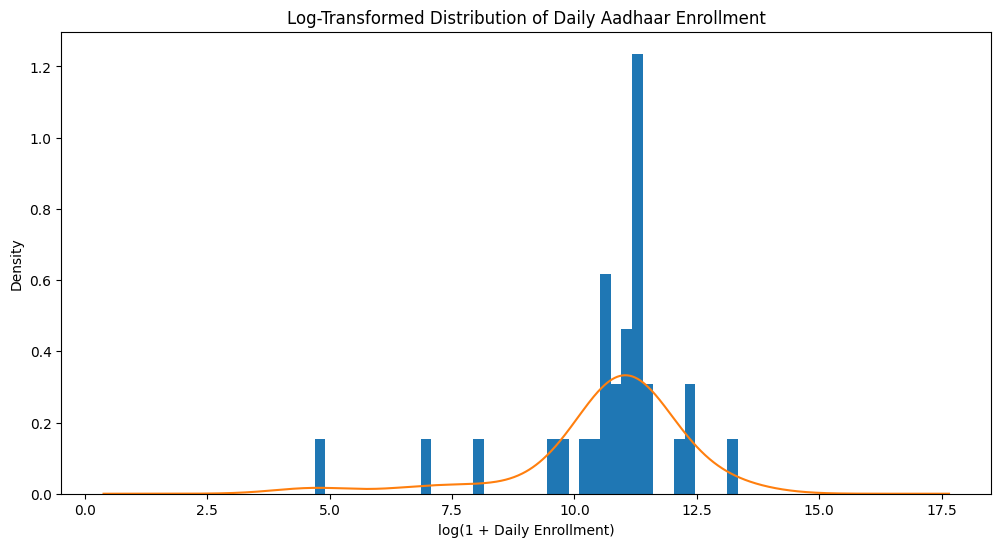

In [25]:
daily = df_time.groupby('date')['total_enrollment'].sum()

plt.figure(figsize=(12,6))

# Histogram
plt.hist(np.log1p(daily), bins=40, density=True)

# KDE line
np.log1p(daily).plot(kind='kde')

plt.title("Log-Transformed Distribution of Daily Aadhaar Enrollment")
plt.xlabel("log(1 + Daily Enrollment)")
plt.ylabel("Density")
plt.show()



beacause we are have right skewed data we used 1 log enrollment
he log-transformed daily Aadhaar enrollment data shows an approximately normal distribution with reduced right skewness. This indicates that the original data was positively skewed and that log transformation effectively stabilized variance and minimized the influence of extreme values


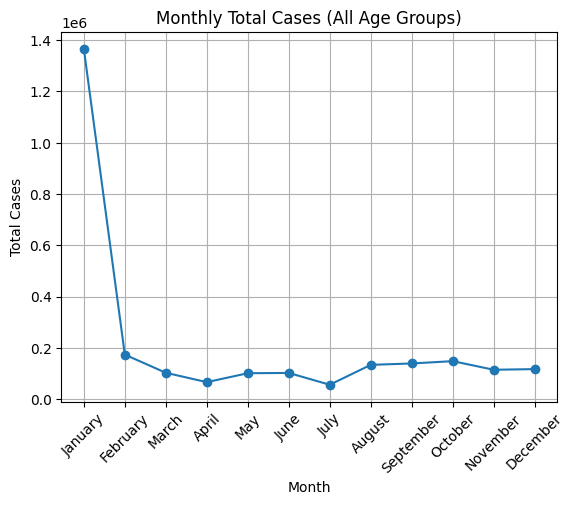

In [26]:
import matplotlib.pyplot as plt

# create total column


df_time['total_cases'] = (df_time['age_0_5'] +df_time['age_5_17'] +df_time['age_18_greater'])

# group & sort by month
monthly_total = (
    df_time
    .groupby(['month', 'month_name'])['total_cases']
    .sum()
    .sort_index(level=0)
)

plt.figure()
plt.plot(monthly_total.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Monthly Total Cases (All Age Groups)')
plt.xticks(
    range(len(monthly_total)),
    monthly_total.index.get_level_values(1),
    rotation=45
)
plt.grid(True)
plt.show()



- January is a massive outlier

- Very high standard deviation in January

- Remaining months are relatively stable

##### **January showed abnormal enrollment behavior and was treated as an outlier month for secondary statistical analysis.**

In [27]:
df_time.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month,month_name,week,day,weekday,total_enrollment,total_cases
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,2,February,6,3,Monday,109,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,9,September,36,3,Wednesday,86,86
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,September,36,3,Wednesday,123,123
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,9,September,36,3,Wednesday,106,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,9,September,36,3,Wednesday,51,51


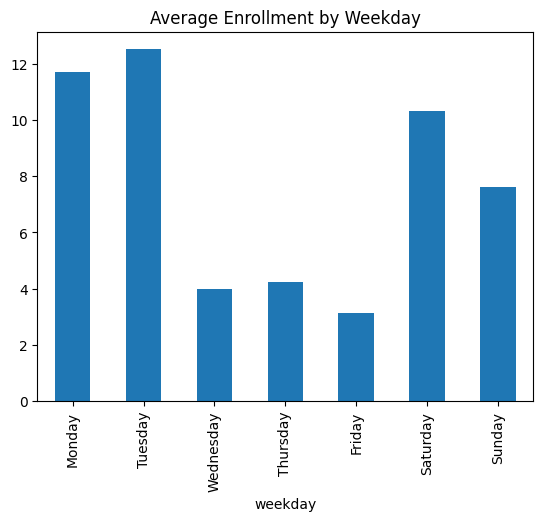

In [28]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday', 'Sunday']

weekday_stats = (
    df_time.groupby('weekday')['total_enrollment']
    .mean()
    .reindex(weekday_order)
)

weekday_stats.plot(kind='bar', title="Average Enrollment by Weekday")
plt.show()



- Lower weekends

- Midweek peaks (Tue–Thu)

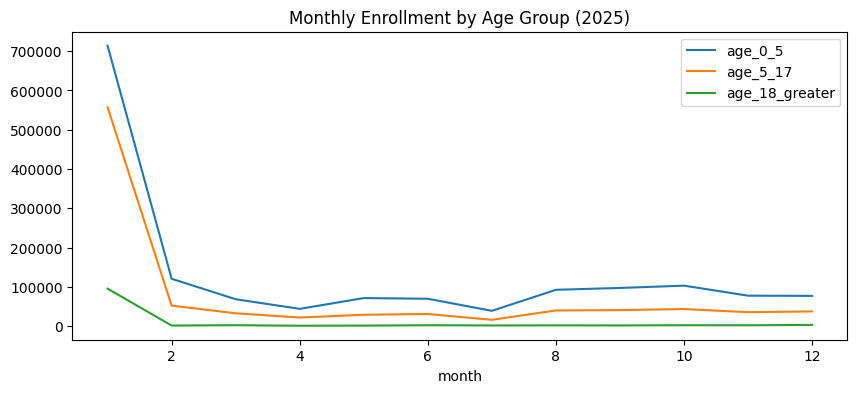

In [29]:
monthly_age = df_time.groupby('month')[['age_0_5','age_5_17','age_18_greater']].sum()

monthly_age.plot(figsize=(10,4))
plt.title("Monthly Enrollment by Age Group (2025)")
plt.show()


1. Child Enrollment Dominance

"The 0–5 age group consistently has the highest enrollment, peaking in January around 700k, showing that early childhood programs are most utilized."

2. Adult Enrollment Stability

"Adults (18+) have low and steady enrollment below 100k, with no major spikes, indicating limited but consistent participation."

3. Month-Specific Shifts

"Enrollment spikes in January, drops February–July, slightly recovers August–October, and declines toward year-end, reflecting seasonal intake cycles."

4. Additional Observations

"The 5–17 group mirrors the 0–5 trend at lower levels, and the gap between children and adults is largest in January, highlighting strong seasonal demand for younger age groups."

In [30]:
from scipy.stats import ttest_ind

ttest_ind(
    df_time['age_0_5'],
    df_time['age_18_greater'],
    equal_var=False
)


TtestResult(statistic=np.float64(83.49300630466493), pvalue=np.float64(0.0), df=np.float64(340667.62202420615))

**0-5 vs 18+ age group**

his measures how far apart the two group means are, relative to the variability in the data.

A value of 84 is extremely large.

It means the difference between the two groups is huge compared to random noise.

TtestResult(
  statistic = 84.05,
  pvalue    = 0.0,
  df        = 345008.03
)


In [31]:
df_time

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month,month_name,week,day,weekday,total_enrollment,total_cases
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,2,February,6,3,Monday,109,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,9,September,36,3,Wednesday,86,86
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,September,36,3,Wednesday,123,123
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,9,September,36,3,Wednesday,106,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,9,September,36,3,Wednesday,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728157,2025-12-11,West Bengal,Uttar Dinajpur,733216,0,2,0,12,December,50,11,Thursday,2,2
728158,2025-12-11,West Bengal,West Midnapore,721102,2,1,0,12,December,50,11,Thursday,3,3
728159,2025-12-11,West Bengal,West Midnapore,721133,1,0,0,12,December,50,11,Thursday,1,1
728160,2025-12-11,West Bengal,West Midnapore,721443,1,0,0,12,December,50,11,Thursday,1,1


#### **up to now we have seen TIME BASED ANALYSIS**

In [32]:
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21


In [33]:
state_month = df_time.groupby(['state','month'])['total_enrollment'].sum().reset_index()

state_month[state_month['month'] == 1].sort_values(
    by='total_enrollment', ascending=False
).head(10)


,state,month,total_enrollment
483,Uttar Pradesh,1,329909
63,Bihar,1,176378
169,Gujarat,1,119113
290,Madhya Pradesh,1,116898
51,Assam,1,100641
302,Maharashtra,1,90417
326,Meghalaya,1,86415
422,Rajasthan,1,60656
522,West Bengal,1,56330
242,Karnataka,1,46370


In [34]:
df1['state'].nunique()

55

In [35]:
df1['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [36]:
df1['state_clean'] = (
    df1['state']
    .astype(str)
    .str.strip()
    .str.lower()
)


In [37]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'west bengal ': 'West Bengal',
    'west bengal.': 'West Bengal',
    'west bengal,': 'West Bengal',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'west bengal': 'West Bengal',

    # Odisha
    'orissa': 'Odisha',
    'odisha': 'Odisha',

    # Puducherry
    'pondicherry': 'Puducherry',
    'puducherry': 'Puducherry',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Jammu & Kashmir / Ladakh
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu & kashmir': 'Jammu and Kashmir',
    'jammu and kashmir ': 'Jammu and Kashmir',

    # Dadra & Nagar Haveli and Daman & Diu
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra & nagar haveli': 'Dadra and Nagar Haveli',
    'daman and diu': 'Daman and Diu',
    'daman & diu': 'Daman and Diu',

    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',

    # Garbage / invalid
    '100000': np.nan
}


In [38]:
df1['state_standard'] = (
    df1['state_clean']
    .replace(state_mapping)
)


In [39]:
df1['state_standard'] = (
    df1['state_standard']
    .fillna(df1['state'].str.title())
)


In [40]:
df1['state'].nunique()


55

In [41]:
sorted(df1['state_standard'].unique())


['100000',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman and Diu',
 'Jammu and Kashmir',
 'Odisha',
 'Puducherry',
 'West Bengal',
 'arunachal pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra and nagar haveli',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil nadu',
 'telangana',
 'the dadra and nagar haveli and daman and diu',
 'tripura',
 'uttar pradesh',
 'uttarakhand']

In [42]:
from rapidfuzz import process

valid_states = [
    'Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh',
    'Goa','Gujarat','Haryana','Himachal Pradesh','Jharkhand','Karnataka',
    'Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya',
    'Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim',
    'Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand',
    'West Bengal','Delhi','Jammu and Kashmir','Ladakh',
    'Puducherry','Chandigarh','Andaman and Nicobar Islands',
    'Dadra and Nagar Haveli and Daman and Diu','Lakshadweep'
]

def fuzzy_fix(x):
    match, score, _ = process.extractOne(x, valid_states)
    return match if score > 85 else x

df1['state_standard'] = df1['state_standard'].apply(fuzzy_fix)


In [43]:
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean,state_standard
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,meghalaya,Meghalaya
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,karnataka,Karnataka
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,uttar pradesh,uttar pradesh
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,uttar pradesh,uttar pradesh
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,karnataka,Karnataka


In [44]:
df1['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [45]:
df1["state_clean"].unique()

array(['meghalaya', 'karnataka', 'uttar pradesh', 'bihar', 'maharashtra',
       'haryana', 'rajasthan', 'punjab', 'delhi', 'madhya pradesh',
       'west bengal', 'assam', 'uttarakhand', 'gujarat', 'andhra pradesh',
       'tamil nadu', 'chhattisgarh', 'jharkhand', 'nagaland', 'manipur',
       'telangana', 'tripura', 'mizoram', 'jammu and kashmir',
       'chandigarh', 'sikkim', 'odisha', 'kerala',
       'the dadra and nagar haveli and daman and diu',
       'arunachal pradesh', 'himachal pradesh', 'goa',
       'dadra and nagar haveli and daman and diu', 'ladakh',
       'andaman and nicobar islands', 'orissa', 'pondicherry',
       'puducherry', 'lakshadweep', 'andaman & nicobar islands',
       'dadra & nagar haveli', 'dadra and nagar haveli', 'daman and diu',
       'jammu & kashmir', 'west  bengal', '100000', 'daman & diu',
       'west bangal', 'westbengal'], dtype=object)

In [46]:
df1["state_standard"].unique()

array(['Meghalaya', 'Karnataka', 'uttar pradesh', 'bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'punjab', 'delhi', 'Madhya Pradesh',
       'West Bengal', 'assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'tamil nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'sikkim', 'Odisha', 'kerala', 'Arunachal Pradesh',
       'Himachal Pradesh', 'goa',
       'Dadra and Nagar Haveli and Daman and Diu', 'ladakh',
       'Andaman and Nicobar Islands', 'Puducherry', 'Lakshadweep',
       '100000'], dtype=object)

In [47]:
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean,state_standard
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,meghalaya,Meghalaya
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,karnataka,Karnataka
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,uttar pradesh,uttar pradesh
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,uttar pradesh,uttar pradesh
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,karnataka,Karnataka


In [48]:
final_cols = [
    'date',
    'state_standard',
    'district',
    'pincode',
    'age_0_5',
    'age_5_17',
    'age_18_greater',
    
]

df_final = df1[final_cols].copy()



In [49]:
df_final.head()

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21


In [50]:
df_final.shape

(983072, 7)

#### **The dataset contained partial temporal coverage, with date information available for approximately 32% of records. I therefore separated the analysis into two tracks: a time-series analysis using date-complete records, and a full-scale demographic and geographic analysis using the entire dataset.**

In [51]:
df_final['state'] = (
    df_final['state_standard']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.title()
)


In [52]:
df_final['total_enrollment'] = (
    df_final['age_0_5'] +
    df_final['age_5_17'] +
    df_final['age_18_greater']
)


In [53]:
df_final.head()

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,state,total_enrollment
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,Meghalaya,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,Karnataka,86
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,Uttar Pradesh,123
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,Uttar Pradesh,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,Karnataka,51


In [54]:
df_final=df_final.drop(columns=["state"])

In [55]:
df_final.head()

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [56]:
df_final.shape

(983072, 8)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12820\2456719943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['month'] = df_final['date'].dt.month


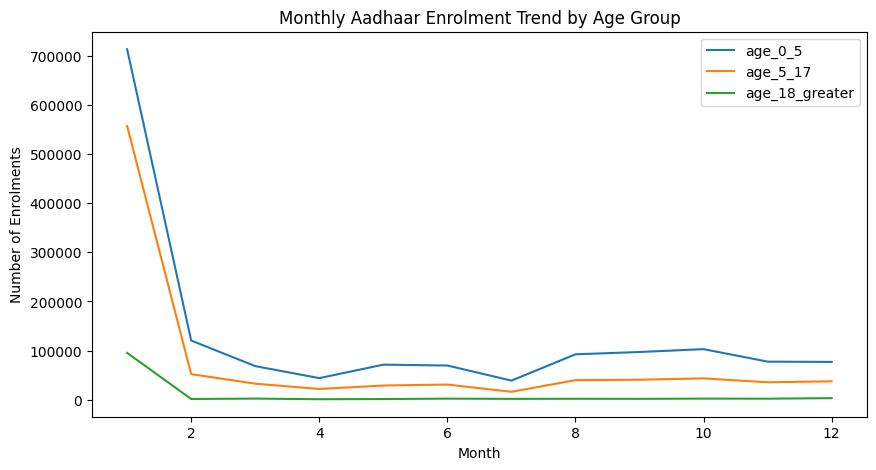

In [85]:
df_final['month'] = df_final['date'].dt.month
age_trend = df_final.groupby('month')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_trend
age_trend.plot(figsize=(10,5))
plt.title('Monthly Aadhaar Enrolment Trend by Age Group')
plt.xlabel('Month')
plt.ylabel('Number of Enrolments')
plt.show()

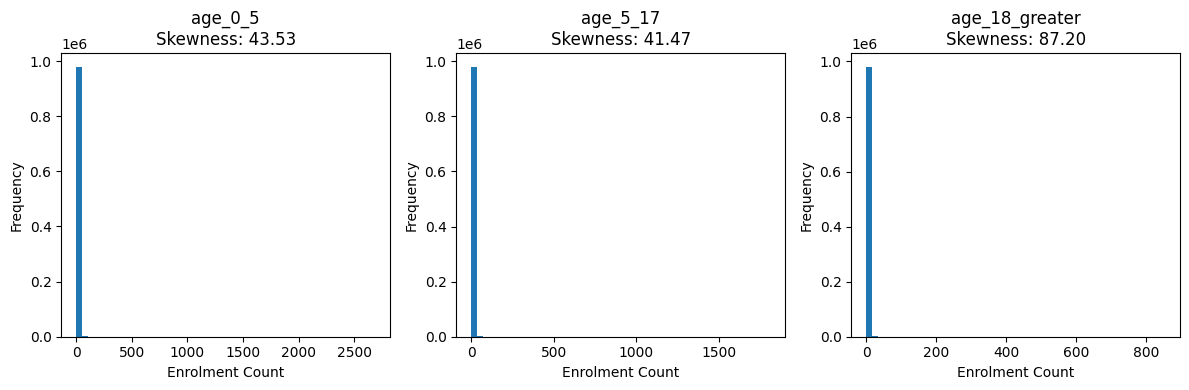

In [86]:
numeric_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
skewness_values = df_final[numeric_cols].skew()

skewness_values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    plt.hist(df_final[col], bins=50)
    plt.title(f'{col}\nSkewness: {df_final[col].skew():.2f}')
    plt.xlabel('Enrolment Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


All three age columns are highly right-skewed

Most values are very small (near zero)

Very few records have very large enrolment counts

The 18+ age group is the most skewed, meaning:

High adult enrolments happen very rarely

Child age groups (0–5 and 5–17) are also skewed, but less extreme

now we got the another good data we observe now about the enorollment on ,states ,district level and age based 

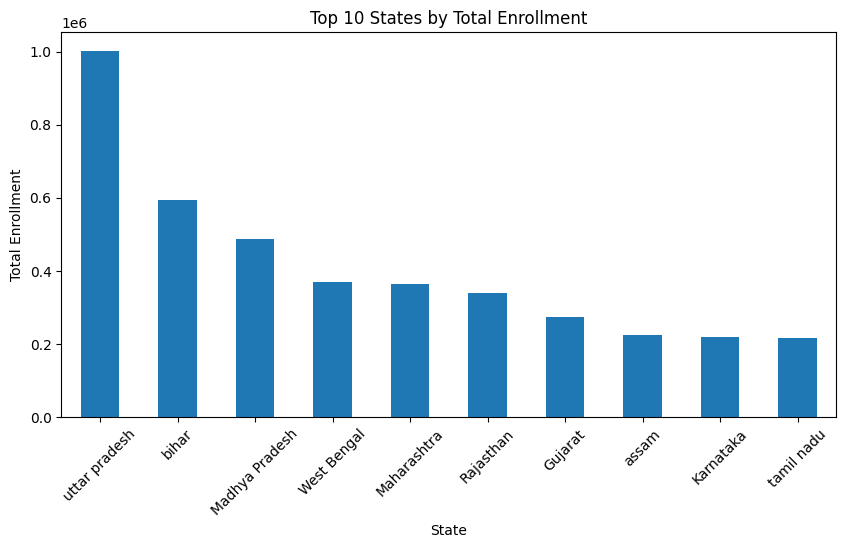

In [57]:
state_enrollment = (
    df_final
    .groupby('state_standard')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
state_enrollment.head(10).plot(kind='bar')
plt.title("Top 10 States by Total Enrollment")
plt.xlabel("State")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45)
plt.show()


In [58]:
df_final['district_state'] = (
    df_final['district'].str.strip() + ", " +
    df_final['state_standard'].str.strip()
)


In [59]:
df_final.head(15)

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment,district_state
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109,"East Khasi Hills, Meghalaya"
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86,"Bengaluru Urban, Karnataka"
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,123,"Kanpur Nagar, uttar pradesh"
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,106,"Aligarh, uttar pradesh"
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51,"Bengaluru Urban, Karnataka"
5,2025-09-03,bihar,Sitamarhi,843331,20,49,12,81,"Sitamarhi, bihar"
6,2025-09-03,bihar,Sitamarhi,843330,23,24,42,89,"Sitamarhi, bihar"
7,2025-09-03,uttar pradesh,Bahraich,271865,26,60,14,100,"Bahraich, uttar pradesh"
8,2025-09-03,uttar pradesh,Firozabad,283204,28,26,10,64,"Firozabad, uttar pradesh"
9,2025-09-03,bihar,Purbi Champaran,845418,30,48,10,88,"Purbi Champaran, bihar"


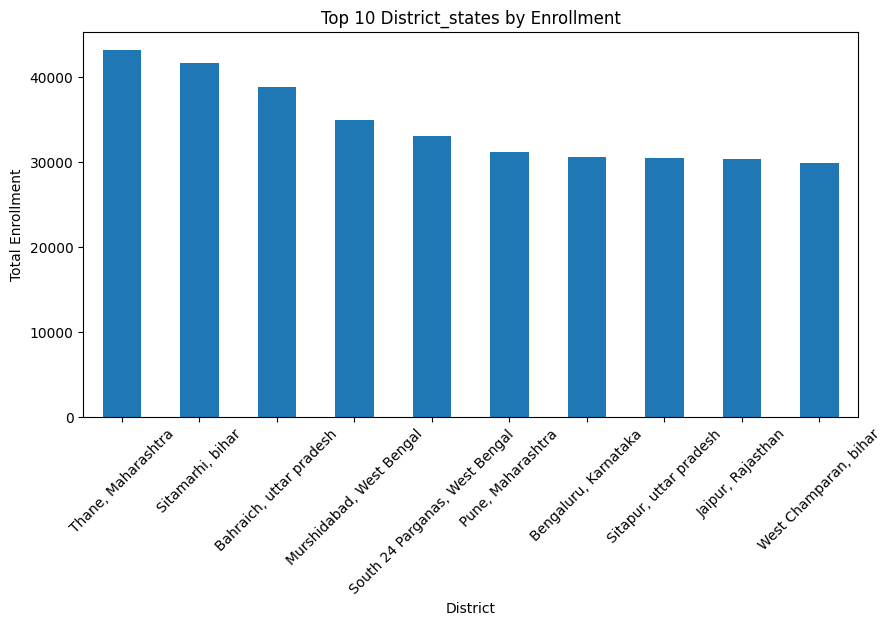

In [60]:
district_enrollment = (
    df_final
    .groupby('district_state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
district_enrollment.head(10).plot(kind='bar')
plt.title("Top 10 District_states by Enrollment")
plt.xlabel("District")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45)
plt.show()


In [61]:
df_final['geo_key'] = (
    df_final['state_standard'].str.strip() + " | " +
    df_final['district'].str.strip() + " | " +
    df_final['pincode'].astype(str)
)


In [62]:
df_final.head()

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment,district_state,geo_key
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109,"East Khasi Hills, Meghalaya",Meghalaya | East Khasi Hills | 793121
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86,"Bengaluru Urban, Karnataka",Karnataka | Bengaluru Urban | 560043
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,123,"Kanpur Nagar, uttar pradesh",uttar pradesh | Kanpur Nagar | 208001
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,106,"Aligarh, uttar pradesh",uttar pradesh | Aligarh | 202133
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51,"Bengaluru Urban, Karnataka",Karnataka | Bengaluru Urban | 560016


In [63]:
pincode_analysis = (
    df_final
    .groupby('geo_key')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
)

pincode_analysis.head(10)


geo_key
uttar pradesh | Moradabad | 244001       15122
uttar pradesh | Aligarh | 202001         11678
Meghalaya | West Khasi Hills | 793119    11237
delhi | West Delhi | 110059              10462
uttar pradesh | Saharanpur | 247001       9993
uttar pradesh | Rampur | 244901           9506
uttar pradesh | Meerut | 250002           9152
Maharashtra | Aurangabad | 431001         8628
uttar pradesh | Agra | 282001             8551
uttar pradesh | Shahjahanpur | 242001     8470
Name: total_enrollment, dtype: int64

In [64]:
district_pincode = (
    df_final
    .groupby(['district', 'pincode'])['total_enrollment']
    .sum()
    .reset_index()
    .sort_values(['district', 'total_enrollment'], ascending=[True, False])
)

district_pincode.head(10)


,district,pincode,total_enrollment
0,100000,100000,214
22,24 Paraganas North,743329,1418
23,24 Paraganas North,743423,759
8,24 Paraganas North,700125,480
19,24 Paraganas North,743263,409
11,24 Paraganas North,743127,335
4,24 Paraganas North,700110,266
5,24 Paraganas North,700119,261
15,24 Paraganas North,743248,243
13,24 Paraganas North,743235,186


In [65]:

df_final['geo_key'] = (
    df_final['district_state'] + " | " + df_final['pincode'].astype(str)
)


In [66]:
df_final.head()

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment,district_state,geo_key
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109,"East Khasi Hills, Meghalaya","East Khasi Hills, Meghalaya | 793121"
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86,"Bengaluru Urban, Karnataka","Bengaluru Urban, Karnataka | 560043"
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,123,"Kanpur Nagar, uttar pradesh","Kanpur Nagar, uttar pradesh | 208001"
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,106,"Aligarh, uttar pradesh","Aligarh, uttar pradesh | 202133"
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51,"Bengaluru Urban, Karnataka","Bengaluru Urban, Karnataka | 560016"


In [67]:
df_final

,date,state_standard,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment,district_state,geo_key
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109,"East Khasi Hills, Meghalaya","East Khasi Hills, Meghalaya | 793121"
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86,"Bengaluru Urban, Karnataka","Bengaluru Urban, Karnataka | 560043"
2,2025-09-03,uttar pradesh,Kanpur Nagar,208001,29,82,12,123,"Kanpur Nagar, uttar pradesh","Kanpur Nagar, uttar pradesh | 208001"
3,2025-09-03,uttar pradesh,Aligarh,202133,62,29,15,106,"Aligarh, uttar pradesh","Aligarh, uttar pradesh | 202133"
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51,"Bengaluru Urban, Karnataka","Bengaluru Urban, Karnataka | 560016"
...,...,...,...,...,...,...,...,...,...,...
1004907,NaT,West Bengal,South Twenty Four Parganas,743376,0,1,0,1,"South Twenty Four Parganas, West Bengal","South Twenty Four Parganas, West Bengal | 743376"
1004908,NaT,West Bengal,Uttar Dinajpur,733202,16,33,0,49,"Uttar Dinajpur, West Bengal","Uttar Dinajpur, West Bengal | 733202"
1004909,NaT,West Bengal,West Midnapore,721101,2,1,0,3,"West Midnapore, West Bengal","West Midnapore, West Bengal | 721101"
1004910,NaT,West Bengal,West Midnapore,721212,1,1,0,2,"West Midnapore, West Bengal","West Midnapore, West Bengal | 721212"


In [68]:
df_final["state_standard"].value_counts()

state_standard
uttar pradesh                               108066
tamil nadu                                   90388
Maharashtra                                  75531
West Bengal                                  75371
Karnataka                                    68787
Andhra Pradesh                               63837
bihar                                        58542
Rajasthan                                    54864
Madhya Pradesh                               49562
Odisha                                       45942
Gujarat                                      45243
Telangana                                    41878
kerala                                       38581
assam                                        30699
Jharkhand                                    22680
punjab                                       20081
Chhattisgarh                                 17981
Haryana                                      15522
Jammu and Kashmir                            11196
Himachal Pradesh

In [69]:
df_final["state_standard"].unique()

array(['Meghalaya', 'Karnataka', 'uttar pradesh', 'bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'punjab', 'delhi', 'Madhya Pradesh',
       'West Bengal', 'assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'tamil nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'sikkim', 'Odisha', 'kerala', 'Arunachal Pradesh',
       'Himachal Pradesh', 'goa',
       'Dadra and Nagar Haveli and Daman and Diu', 'ladakh',
       'Andaman and Nicobar Islands', 'Puducherry', 'Lakshadweep',
       '100000'], dtype=object)

In [70]:
df_final["state_standard"].nunique()

37

In [71]:
df_final = df_final[df_final['state_standard'] != '100000']


In [72]:
df_final["state_standard"].nunique()

36

In [78]:
import pandas as pd

# 1️⃣ State total enrollment
state_totals = (
    df_final
    .groupby('state_standard')['total_enrollment']
    .sum()
)

# 2️⃣ Overall total (all states)
overall_total = state_totals.sum()

# 3️⃣ District–pincode totals
dp_totals = (
    df_final
    .groupby(['state_standard', 'district', 'pincode'])['total_enrollment']
    .sum()
    .reset_index()
)

# 4️⃣ Add state total & percentage within state
dp_totals['state_total'] = dp_totals['state_standard'].map(state_totals)
dp_totals['pct_within_state'] = (
    dp_totals['total_enrollment'] / dp_totals['state_total'] * 100
)

# 5️⃣ Add overall state percentage
state_percentage = (state_totals / overall_total * 100)

# 6️⃣ FINAL PRINT OUTPUT
for state in dp_totals['state_standard'].unique():
    
    print(f"\nSTATE: {state}")
    print("-" * 40)
    
    state_df = (
        dp_totals[dp_totals['state_standard'] == state]
        .sort_values('pct_within_state', ascending=False)
    )
    
    for _, row in state_df.iterrows():
        label = f"{row['district']} | {row['pincode']}"
        pct = f"{row['pct_within_state']:.1f}%"
        total = int(row['total_enrollment'])
        
        print(f"{label:<30} {pct:>7}   {total}")
    
    print("-" * 40)
    print(f"Overall State Contribution: {state_percentage[state]:.1f}%")



STATE: Andaman and Nicobar Islands
----------------------------------------
Nicobar | 744301                 13.2%   66
South Andaman | 744105           10.4%   52
North And Middle Andaman | 744202   10.2%   51
South Andaman | 744103            7.0%   35
South Andaman | 744102            6.6%   33
South Andaman | 744206            5.8%   29
North And Middle Andaman | 744205    5.0%   25
Andamans | 744103                 4.8%   24
South Andaman | 744101            4.8%   24
Andamans | 744105                 4.2%   21
North And Middle Andaman | 744204    4.0%   20
South Andaman | 744207            3.2%   16
South Andaman | 744106            3.0%   15
North And Middle Andaman | 744201    2.4%   12
South Andaman | 744107            2.0%   10
Andamans | 744101                 1.8%   9
North And Middle Andaman | 744210    1.8%   9
North And Middle Andaman | 744209    1.4%   7
Andamans | 744107                 1.4%   7
South Andaman | 744104            1.2%   6
Andamans | 744106             

In [88]:
# 1️⃣ Total enrollment per state
state_totals = (
    df_final
    .groupby('state_standard')['total_enrollment']
    .sum()
)

# 2️⃣ Overall total enrollment (all states)
overall_total = state_totals.sum()

# 3️⃣ Percentage contribution of each state
state_percentage = (
    state_totals / overall_total * 100
).sort_values(ascending=False)

# 4️⃣ Display result
state_percentage=state_percentage.round(2)
state_percentage


state_standard
uttar pradesh                               18.81
bihar                                       11.14
Madhya Pradesh                               9.15
West Bengal                                  6.93
Maharashtra                                  6.82
Rajasthan                                    6.39
Gujarat                                      5.16
assam                                        4.23
Karnataka                                    4.12
tamil nadu                                   4.05
Jharkhand                                    2.88
Telangana                                    2.42
Andhra Pradesh                               2.33
Odisha                                       2.26
Meghalaya                                    2.05
Chhattisgarh                                 1.87
Haryana                                      1.78
delhi                                        1.74
punjab                                       1.42
kerala                             

In [80]:
# Recalculate cleanly (important)
state_totals = df_final.groupby('state_standard')['total_enrollment'].sum()
overall_total = state_totals.sum()

dp_totals = (
    df_final
    .groupby(['state_standard', 'district', 'pincode'])['total_enrollment']
    .sum()
    .reset_index()
)

dp_totals['state_total'] = dp_totals['state_standard'].map(state_totals)
dp_totals['pct_within_state'] = (
    dp_totals['total_enrollment'] / dp_totals['state_total'] * 100
)

state_percentage = state_totals / overall_total * 100

# Threshold (lowered to guarantee visibility)
DOMINANCE_THRESHOLD = 25   # %

for state in dp_totals['state_standard'].unique():
    
    print(f"\nSTATE: {state}")
    print("-" * 50)
    
    state_df = (
        dp_totals[dp_totals['state_standard'] == state]
        .sort_values('pct_within_state', ascending=False)
    )
    
    top_row = state_df.iloc[0]
    
    # Always show top pincode
    print(
        f"TOP PINCODE → {top_row['district']} | {top_row['pincode']} | "
        f"{top_row['pct_within_state']:.1f}% | {int(top_row['total_enrollment'])}"
    )
    
    # Explain result
    if top_row['pct_within_state'] >= DOMINANCE_THRESHOLD:
        print("⚠️ INSIGHT: Enrollment is concentrated in a single pincode")
    else:
        print("ℹ️ INSIGHT: Enrollment is well distributed across pincodes")
    
    print(f"Overall State Contribution: {state_percentage[state]:.1f}%")



STATE: Andaman and Nicobar Islands
--------------------------------------------------
TOP PINCODE → Nicobar | 744301 | 13.2% | 66
ℹ️ INSIGHT: Enrollment is well distributed across pincodes
Overall State Contribution: 0.0%

STATE: Andhra Pradesh
--------------------------------------------------
TOP PINCODE → Kurnool | 518360 | 0.5% | 580
ℹ️ INSIGHT: Enrollment is well distributed across pincodes
Overall State Contribution: 2.3%

STATE: Arunachal Pradesh
--------------------------------------------------
TOP PINCODE → Longding | 792131 | 20.5% | 868
ℹ️ INSIGHT: Enrollment is well distributed across pincodes
Overall State Contribution: 0.1%

STATE: Chandigarh
--------------------------------------------------
TOP PINCODE → Chandigarh | 160036 | 16.3% | 426
ℹ️ INSIGHT: Enrollment is well distributed across pincodes
Overall State Contribution: 0.0%

STATE: Chhattisgarh
--------------------------------------------------
TOP PINCODE → Bijapur | 494444 | 4.0% | 3979
ℹ️ INSIGHT: Enrollment is